# Parts of speech

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
mpl.style.use('bmh')

In [2]:
from lint_analysis.bin_counts.models import BinCount

In [3]:
from lint_analysis.bin_counts import cache

In [4]:
tags = BinCount.pos_tags()

In [18]:
tags_1m = [
    tag for tag in tags
    if cache.pos_series(tag).sum() > 1e6
]

In [19]:
tags_10m = [
    tag for tag in tags
    if cache.pos_series(tag).sum() > 1e7
]

In [29]:
def plot_tags_stacked(tags, corpus=None, w=5, h=5):
    
    plt.figure(figsize=(w, h))

    lines = []
    for tag in tags:
        series = cache.pos_series(tag, corpus=corpus)
        line, = plt.plot(series / series.sum(), label=tag)
        lines.append(line)

    plt.legend(
        handles=lines,
        bbox_to_anchor=(1.03, 1),
        loc=2,
        borderaxespad=0,
    )
    
    plt.xlabel('Narrative time')
    plt.ylabel('Relative frequency')

# Gale 10m+

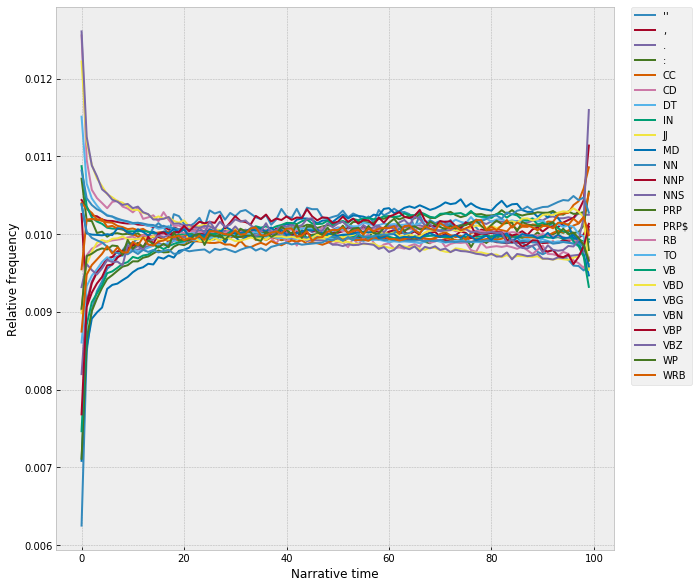

In [30]:
plot_tags_stacked(tags_10m, 'gale', w=10, h=10)

# Chicago 10m+

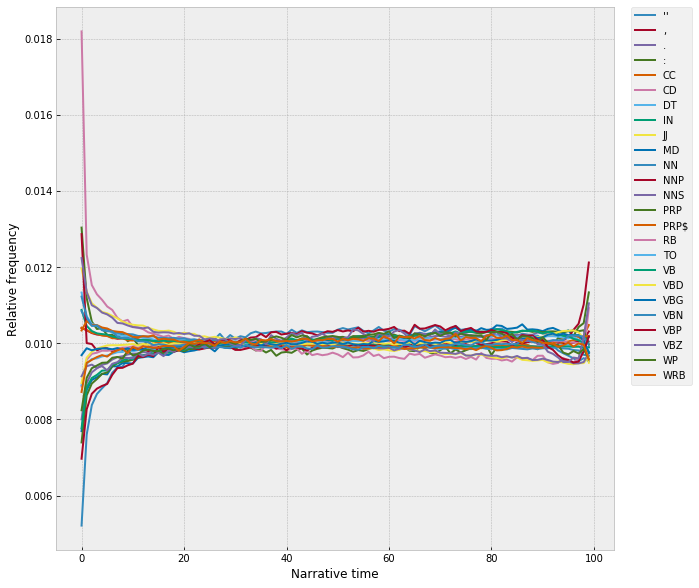

In [32]:
plot_tags_stacked(tags_10m, 'chicago', w=10, h=10)

In [13]:
import numpy as np
import math

def plot_tag_multiples(tags, corpus=None, cols=5):
    
    # Get row count and figure size.
    rows = math.ceil(len(tags) / cols)
    
    # Make the figure + axes.
    plt.figure(figsize=(cols*2, rows*1.6))
    
    for i, tag in enumerate(tags):
        
        # Select the axis for the next plot.
        ax = plt.subplot2grid((rows, cols), (math.floor(i/cols), i%cols))
        
        # Configure axes.
        ax.set_title(tag, fontsize=10)
        ax.tick_params(labelsize=8)
    
        series = cache.pos_series(tag, corpus=corpus)
        ax.plot(series)

    plt.tight_layout(h_pad=1)
    plt.show()

# Gale 10m+

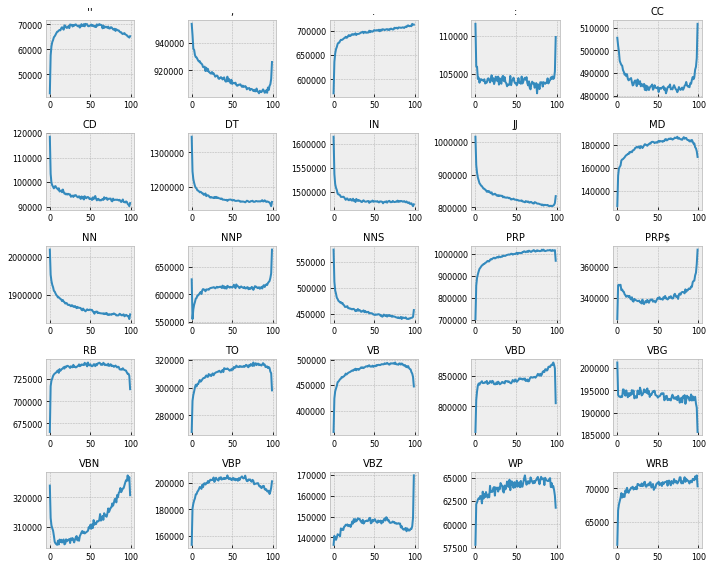

In [21]:
plot_tag_multiples(tags_10m, 'gale')

# Chicago 10m+

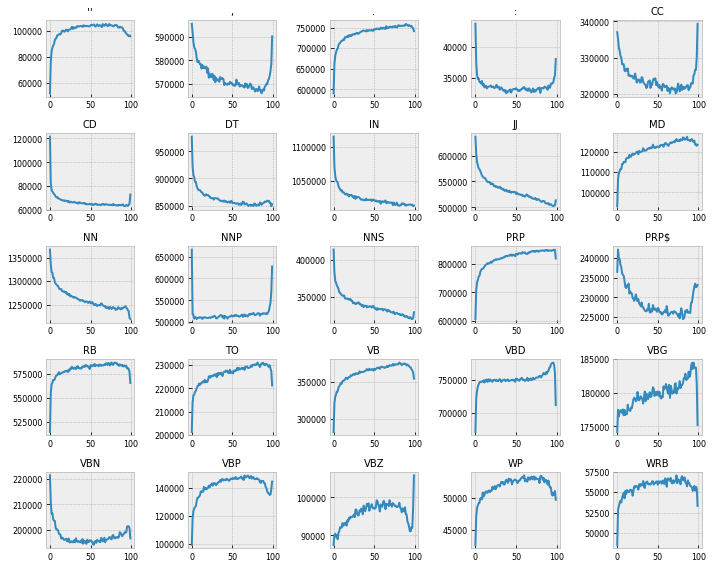

In [15]:
plot_tag_multiples(tags_10m, 'chicago')

# Entire corpus 10m+

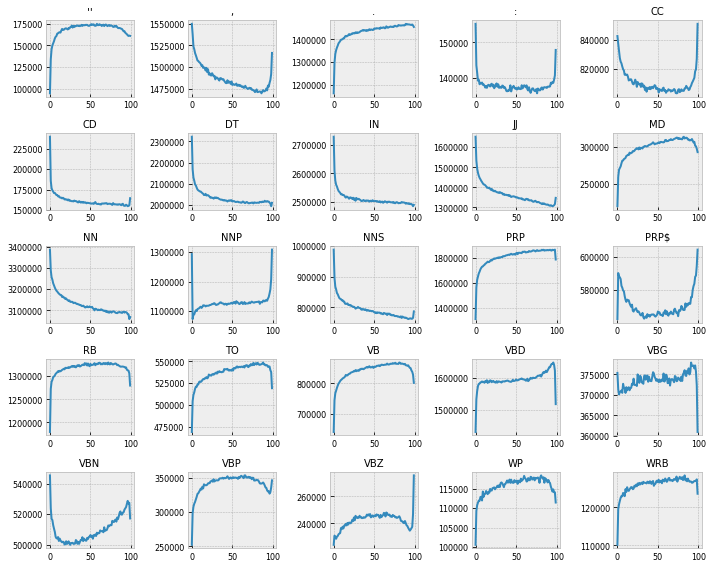

In [16]:
plot_tag_multiples(tags_10m)

# Entire corpus, all tags

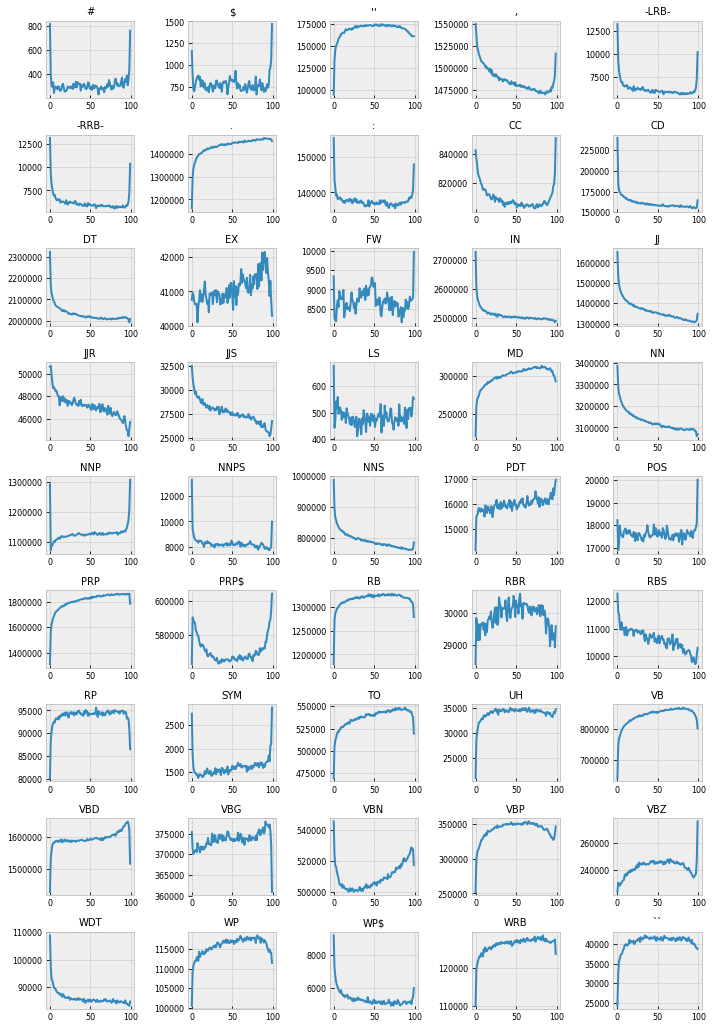

In [47]:
plot_tag_multiples(tags)

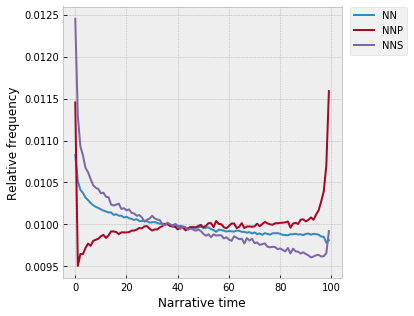

In [33]:
plot_tags_stacked(['NN', 'NNP', 'NNS'])

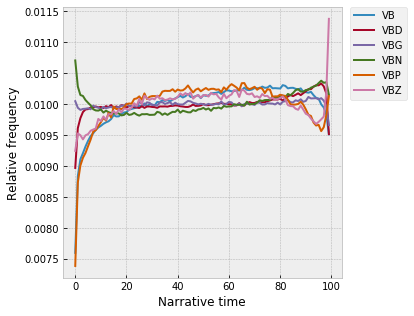

In [34]:
plot_tags_stacked(['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'])

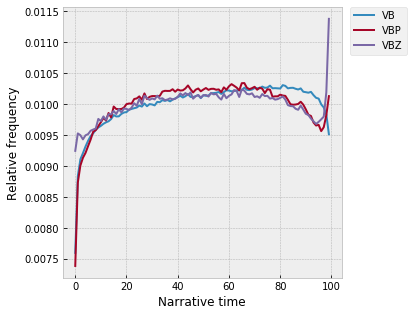

In [36]:
plot_tags_stacked(['VB', 'VBP', 'VBZ'])

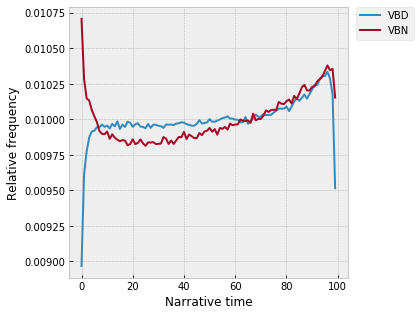

In [37]:
plot_tags_stacked(['VBD', 'VBN'])

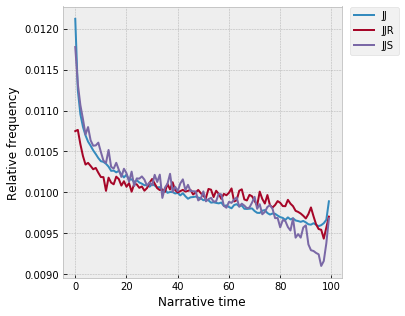

In [38]:
plot_tags_stacked(['JJ', 'JJR', 'JJS'])

In [95]:
from itertools import combinations
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial import distance

In [112]:
d = []
for t1, t2 in combinations(tags_1m, 2):
    
    s1 = cache.pos_series(t1)
    s2 = cache.pos_series(t2)
    
    d.append(distance.euclidean(s1/s1.sum(), s2/s2.sum()))

In [113]:
link = linkage(d, method='ward')

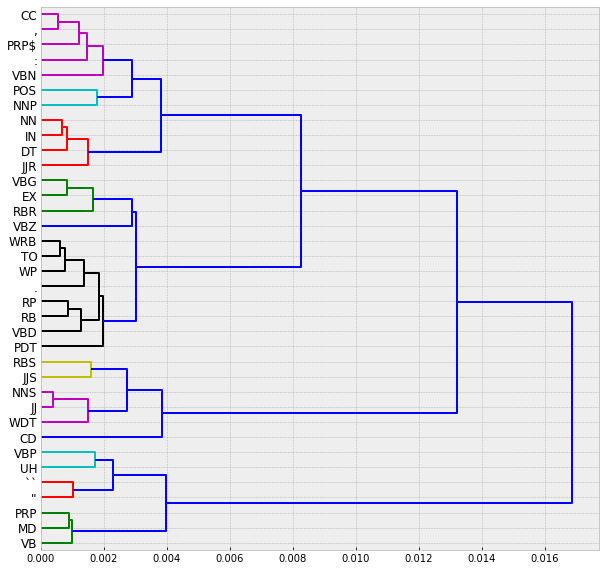

In [118]:
plt.figure(figsize=(10, 10))

dendrogram(
    link,
    labels=tags_1m,
    orientation='right',
    distance_sort='ascending',
    leaf_font_size=12,
    color_threshold=0.002,
)

plt.show()

In [119]:
groups = fcluster(link, 0.002, 'distance')

In [120]:
groups

array([ 2, 12,  7, 12, 12,  6, 10,  8, 10,  4, 10,  5,  1, 10, 11,  4,  7,
       11,  1, 12,  7,  8,  5,  7,  7,  3,  1,  7,  8, 12,  3,  9,  4,  7,
        7,  2], dtype=int32)

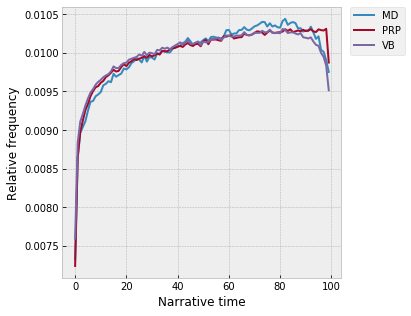

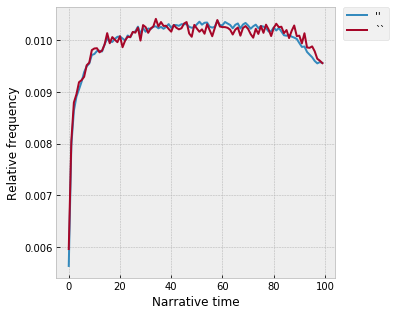

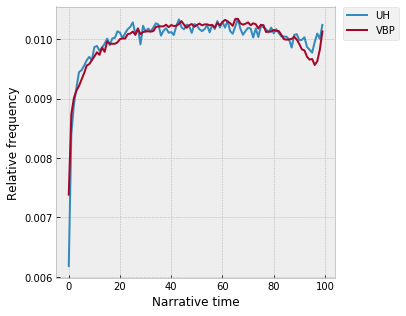

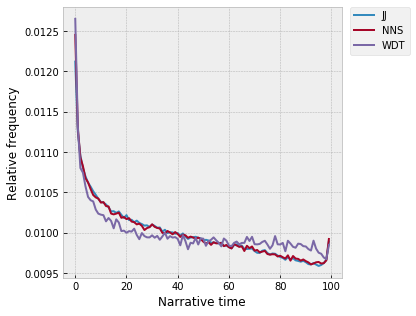

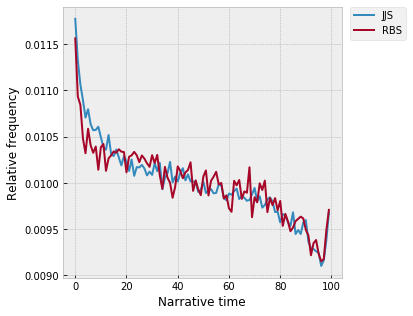

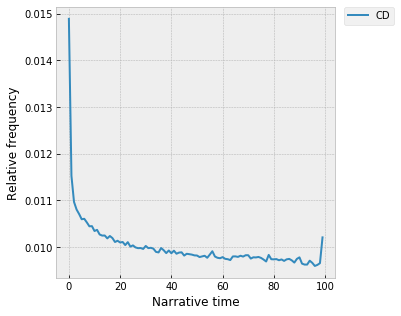

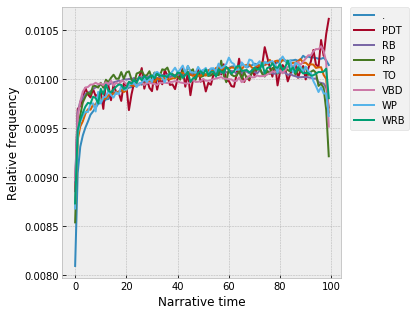

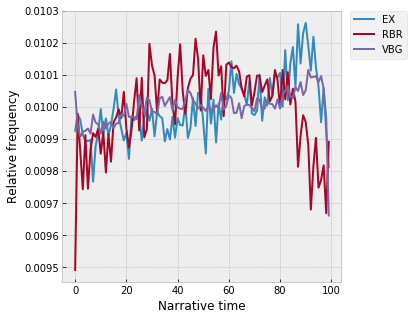

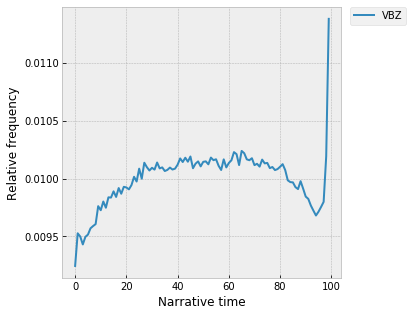

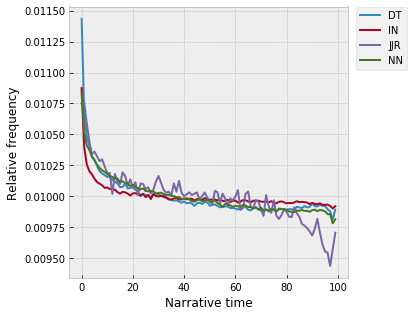

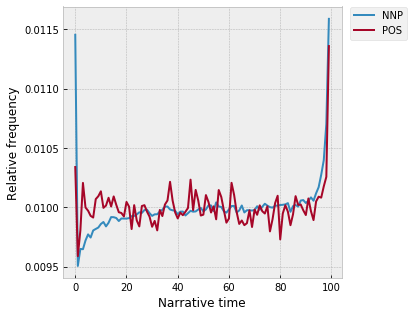

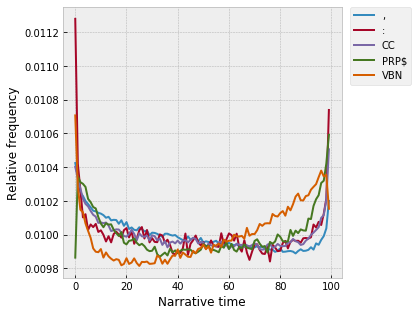

In [121]:
for gid in range(min(groups), max(groups)+1):
    
    ts = [t for (t, j) in zip(tags_1m, groups) if j == gid]
    
    plot_tags_stacked(ts)